<a href="https://colab.research.google.com/github/mohanrajmit/SignatureVerification/blob/main/CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt

In [8]:
!git clone https://github.com/mohanrajmit/CreditCardFraudDetection

fatal: destination path 'CreditCardFraudDetection' already exists and is not an empty directory.


In [9]:


!unzip /content/CreditCardFraudDetection/creditcard.zip

Archive:  /content/CreditCardFraudDetection/creditcard.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print("normal_share=",normal_share,"            ","fraud_share=",fraud_share)

imbalance= (fraud_share/normal_share)*100
print('Imbalance Percentage = ' + str(imbalance))

normal_share= 99.82725143693798              fraud_share= 0.1727485630620034
Imbalance Percentage = 0.173047500131896


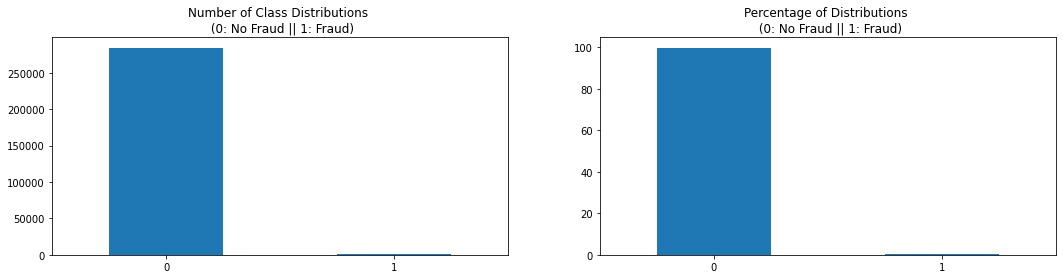

In [13]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
fig, ax = plt.subplots(1, 2, figsize=(18,4))

classes.plot(kind='bar', rot=0, ax=ax[0])
ax[0].set_title('Number of Class Distributions \n (0: No Fraud || 1: Fraud)')

(classes/df['Class'].count()*100).plot(kind='bar', rot=0, ax=ax[1])
ax[1].set_title('Percentage of Distributions \n (0: No Fraud || 1: Fraud)')

plt.show()

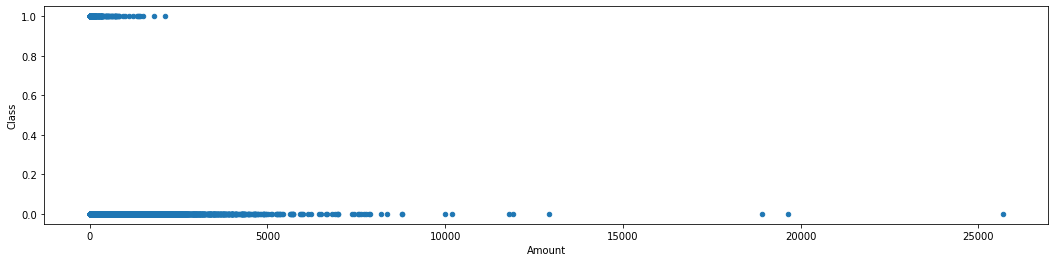

In [14]:
# Create a scatter plot to observe the distribution of classes with Amount
df.plot.scatter(y='Class', x='Amount',figsize=(18,4))

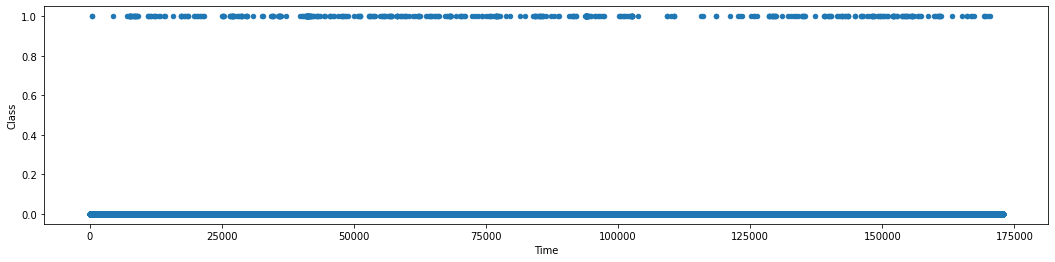

In [15]:
# Create a scatter plot to observe the distribution of classes with time
df.plot.scatter(y='Class', x='Time',figsize=(18,4))

In [16]:
# Drop unnecessary columns
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [18]:
df = df.reset_index()

In [19]:
y= df['Class']
X= df.loc[:, df.columns != 'Class']

In [20]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split (X,y, test_size = 0.3, random_state = 0)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [23]:
X_test.shape, X_train.shape

((85443, 30), (199364, 30))

In [24]:
y_pred = clf.predict(X_test) # Using our test set, let's try and make some predictions

In [25]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve #some scoring functions

In [26]:
confusion_matrix(y_test, y_pred) # How did we do?  

# TN FN
# FP TP                      

array([[85290,     6],
       [   34,   113]])

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
print(classification_report(y_test, model_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.34      0.17      0.23       147

    accuracy                           1.00     85443
   macro avg       0.67      0.58      0.61     85443
weighted avg       1.00      1.00      1.00     85443

